In [17]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

% matplotlib inline

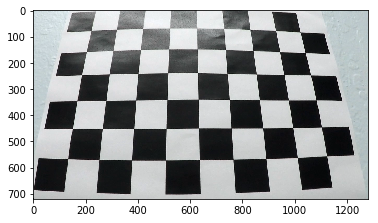

In [18]:
# Load images

calibration_dir = 'camera_cal'
chessboard_files = glob(os.path.join(calibration_dir, "calibration*.jpg"))
chessboard_imgs = [cv2.imread(file) for file in chessboard_files]

plt.imshow(chessboard_imgs[6])
nx=9
ny=6

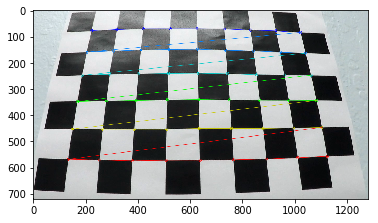

In [25]:

# Find chessboard corners, draw them

def findCorners(img, nx, ny, draw=True):
    # Convert to grayscale
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Find the chessboard corners
    ret, corners = cv2.findChessboardCorners(gray, (nx, ny), None)

    # If found, draw corners
    if ret == True and draw == True:
        # Draw and display the corners
        cv2.drawChessboardCorners(img, (nx, ny), corners, ret)
    return ret, corners

img_points = np.copy(chessboard_imgs[6])
corners = findCorners(img_points, nx, ny)
plt.imshow(img_points)

In [20]:
# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((ny*nx,3), np.float32)
objp[:,:2] = np.mgrid[0:nx, 0:ny].T.reshape(-1,2)


In [21]:
# Find calibration matrix

objpoints = list()
imgpoints = list()

for img in chessboard_imgs:
    ret, corners = findCorners(np.copy(img), nx, ny, False)
    if ret == True:
        imgpoints.append(corners)
        objpoints.append(objp)

ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, img.shape[-2::-1], None, None)


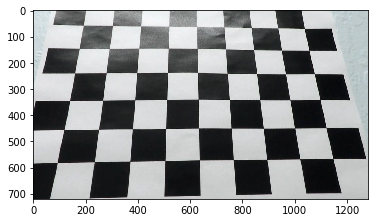

In [27]:
img = np.copy(chessboard_imgs[6])
img_undistort = cv2.undistort ( img, mtx, dist, None, mtx)
plt.imshow(img_undistort)

In [28]:
import pickle
camera_values = {'mtx': mtx, 'dist': dist}
pickle.dump(camera_values, open('camera_values.p', 'wb'))

In [31]:
import os

calibration_images = 'calib'
if not os.path.exists(calibration_images):
    os.makedirs(calibration_images)
    
cv2.imwrite(os.path.join(calibration_images, 'undistort.png'), img_undistort)
cv2.imwrite(os.path.join(calibration_images, 'input.png'), img)
cv2.imwrite(os.path.join(calibration_images, 'points.png'), img_points)

True